# Refactorización del Approach del Problema a Abordar

Debido a las similitudes entre los problemas que los grupos abordaron en la sección, se tomo la decisión de cambiar el aproach del problema. Enfocándonos en lo que es el ajuste de precios de productos en base a distintas variables que puedan tener influencia significativa en esto. Para lograr esto de una manera eficiente se realizará un análisis a profundidad que nos a ayude a comprender de mejor manera esto para mostrar resultados y recomendaciones relevantes.

### Objetivo

El objetivo del modelo es predecir un precio óptimo en funciónd e las características del producto, ubicación del ccliente, tipo de cliente y pago, comportamiento y satisfacción y tiempos de entrega

### Variables en consideración

Las variables que se tienen a disponibles para realizar este análisis son product_category_name_english product_weight_g, product_photos_qty, product_name_lenght, product_description_lenght, customer_city, customer_state, payment_type, payment_value, payment_installments, seller_city, seller_state, freight_value, order_estimated_delivery_date, order_delivered_customer_date, review_score y order_purchase_timestamp. Pero primero realizaremos una matriz de correlación para validarlo.

### Matriz de correlación
Se realizará una matriz de correlación para poder identificar qué variables númericas impactan más nuestra variable objetivo, price. 

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\alambre1\AppData\Local\Temp\ipykernel_12616\2957902576.py:5: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\data_clean\olist_dataset_unificado_clean.csv", parse_dates=[


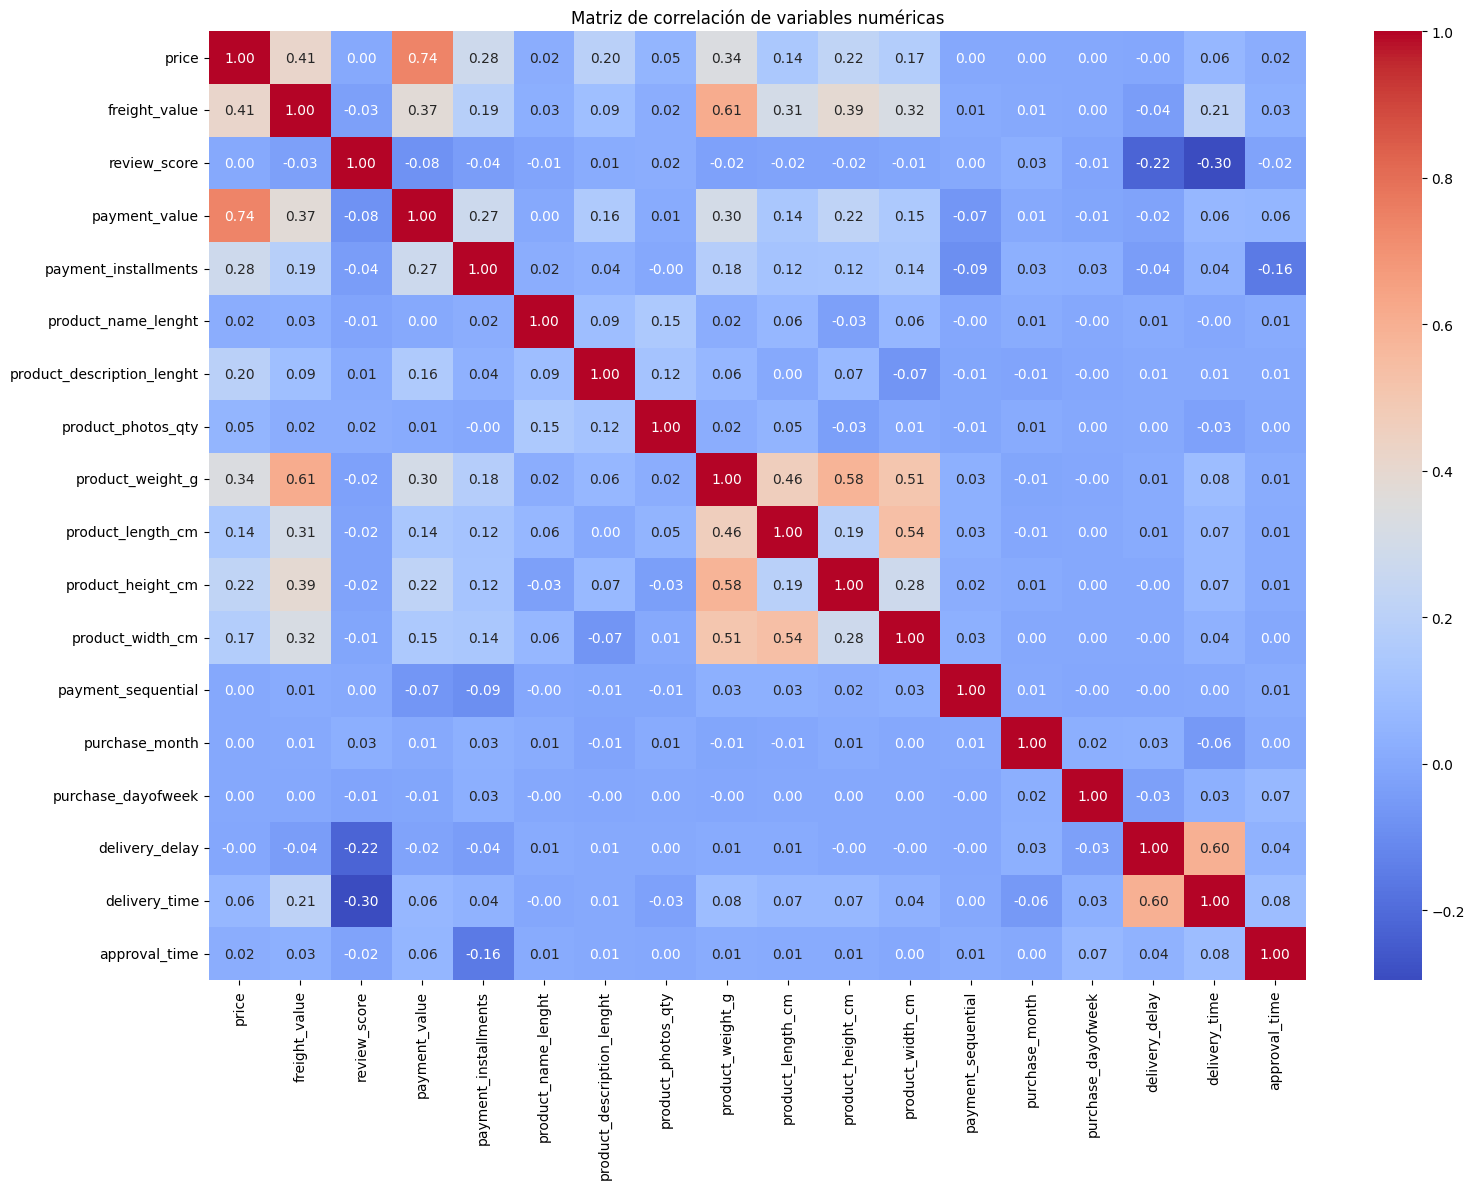

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("..\data_clean\olist_dataset_unificado_clean.csv", parse_dates=[
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "review_creation_date",
    "review_answer_timestamp"
])

# === FEATURES TEMPORALES ===
df["purchase_month"] = df["order_purchase_timestamp"].dt.month
df["purchase_dayofweek"] = df["order_purchase_timestamp"].dt.dayofweek
df["delivery_delay"] = (df["order_delivered_customer_date"] - df["order_estimated_delivery_date"]).dt.days
df["delivery_time"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days
df["approval_time"] = (df["order_approved_at"] - df["order_purchase_timestamp"]).dt.total_seconds() / 3600

# === FILTRO DE VARIABLES NUMÉRICAS ===
numericas = [
    "price", "freight_value", "review_score", "payment_value", "payment_installments",
    "product_name_lenght", "product_description_lenght", "product_photos_qty",
    "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm",
    "payment_sequential", "purchase_month", "purchase_dayofweek",
    "delivery_delay", "delivery_time", "approval_time"
]
df_numerico = df[numericas].dropna()
corr = df_numerico.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación de variables numéricas")
plt.tight_layout()
plt.show()

In [ ]:
categoricas = [
    "customer_state", "seller_state", "payment_type", "product_category_name_english"
]

df_modelo = df[categoricas + numericas].dropna()
df_codificado = pd.get_dummies(df_modelo, drop_first=True)
corr_codificado = df_codificado.corr()
corr_price = corr_codificado["price"].sort_values(ascending=False)
print(corr_price.head(20))


price                                                                  1.000000
payment_value                                                          0.737532
freight_value                                                          0.414298
product_weight_g                                                       0.338484
payment_installments                                                   0.277701
product_category_name_english_computers                                0.233039
product_height_cm                                                      0.222752
product_description_lenght                                             0.199166
product_width_cm                                                       0.172951
seller_state_BA                                                        0.143472
product_length_cm                                                      0.142693
product_category_name_english_watches_gifts                            0.103054
product_category_name_english_home_appli

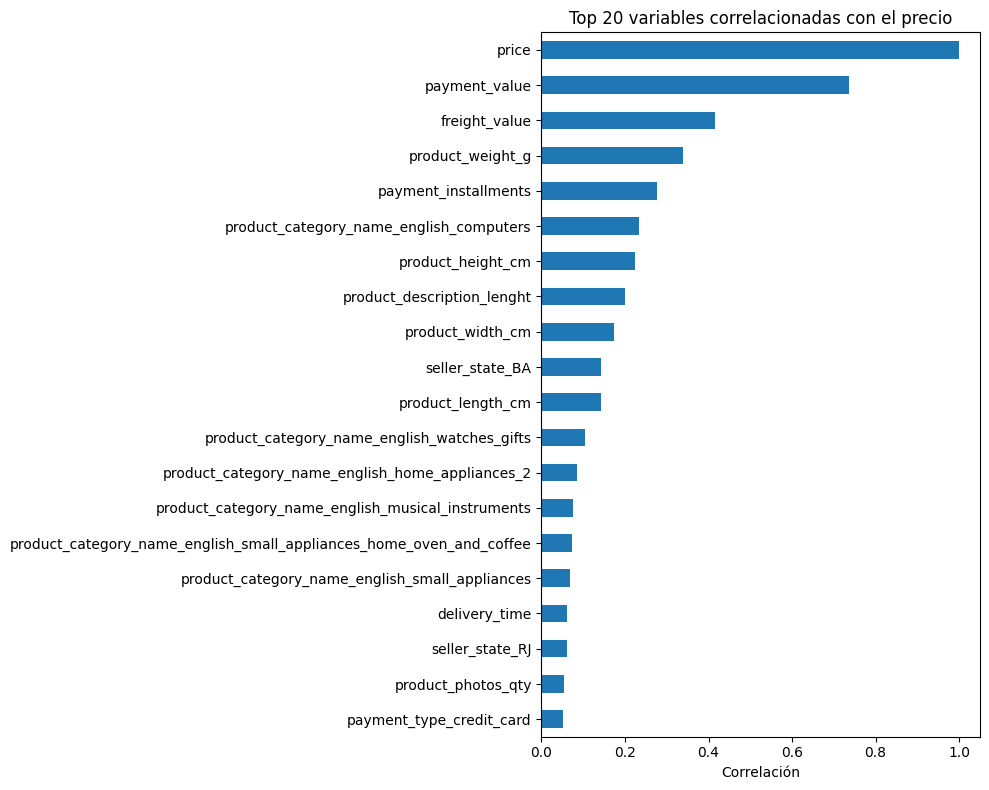

In [4]:
# Graficar top 20
corr_price.head(20).plot(kind='barh', figsize=(10, 8), title='Top 20 variables correlacionadas con el precio')
plt.xlabel("Correlación")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
